In [1]:
from pickle import load
import pandas as pd
import numpy as np
import seaborn as sns
import mediapipe as mp
import cv2

In [2]:
with open("../Datos/Procesados/alphabet_landmarks_spread.pkl", "rb") as f:
    total_results = load(f)

In [3]:
data = []

for k in total_results.keys():
    frame_width = total_results[k]['frame_width']
    frame_height = total_results[k]['frame_height']
    scale = np.array([frame_width, frame_height, frame_width], dtype=np.float64)

    vectors = (total_results[k]['landmarks']['pose'][:, 13:15, :-1] - total_results[k]['landmarks']['pose'][:, 11:13, :-1]) * scale
    total_lengths = np.linalg.norm(vectors, axis=-1)
    plane_lengths = np.linalg.norm(vectors[:, :, :-1], axis=-1)

    for frame in range(total_results[k]['n_frames']):
        for side in range(2):
            data.append([k, frame, side, plane_lengths[frame, side], total_lengths[frame, side]])

df = pd.DataFrame(data=data, columns=('letter', 'frame', 'side', 'plane_length', 'total_length')).astype(
    {'frame': np.uint8, 'side': np.uint8, 'plane_length': np.float64, 'total_length': np.float64}
)
df.set_index(['letter', 'frame', 'side'], inplace=True)
df.head()

plane_length  total_length
letter frame side                            
A      0     0        83.425788     84.321400
             1        84.775173     91.494371
       1     0        83.741303     85.860412
             1        84.710224     91.434402
       2     0        83.976314     87.179405

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5396 entries, ('A', 0, 0) to ('Z', 79, 1)
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   plane_length  5396 non-null   float64
 1   total_length  5396 non-null   float64
dtypes: float64(2)
memory usage: 104.1+ KB


In [128]:
df.describe()

,plane_length,total_length
count,5396.000000,5396.000000
mean,87.065732,125.053367
std,5.377303,48.103742
min,62.595282,82.164531
25%,85.537910,89.629765
50%,87.322745,92.452065
75%,89.899135,184.658872
max,101.655380,244.162397


<Axes: xlabel='frame', ylabel='total_length'>

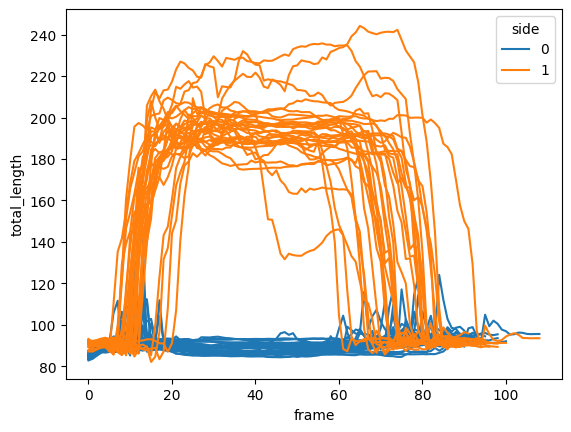

In [64]:
sns.lineplot(data=df, x='frame', y='total_length', hue='side', units='letter', estimator=None)

<Axes: xlabel='frame', ylabel='total_length'>

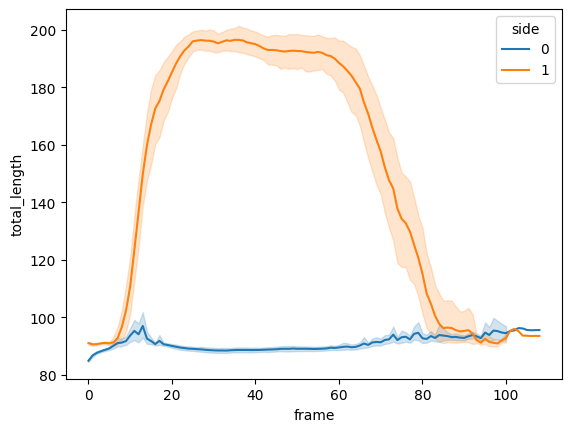

In [66]:
sns.lineplot(data=df, x='frame', y='total_length', hue='side')

<Axes: xlabel='frame', ylabel='total_length'>

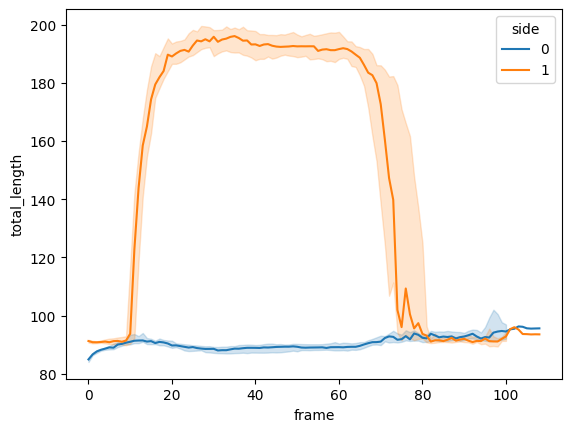

In [65]:
sns.lineplot(data=df, x='frame', y='total_length', hue='side', estimator="median")

<Axes: xlabel='frame', ylabel='plane_length'>

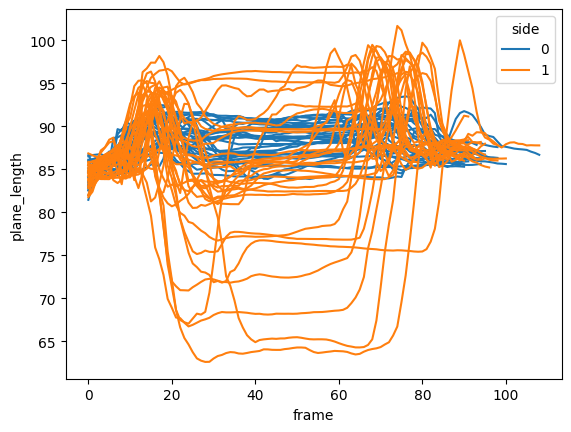

In [67]:
sns.lineplot(data=df, x='frame', y='plane_length', hue='side', units='letter', estimator=None)

<Axes: xlabel='frame', ylabel='plane_length'>

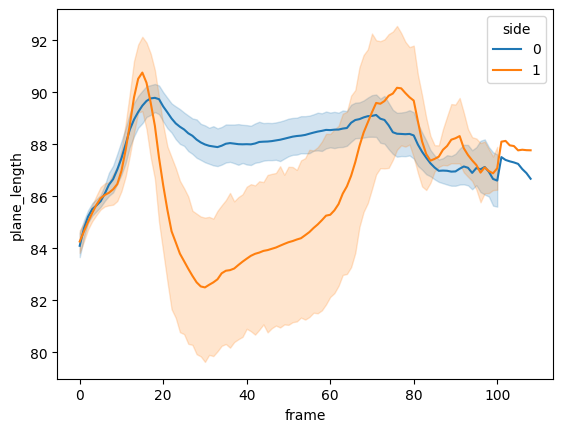

In [68]:
sns.lineplot(data=df, x='frame', y='plane_length', hue='side')

<Axes: xlabel='frame', ylabel='plane_length'>

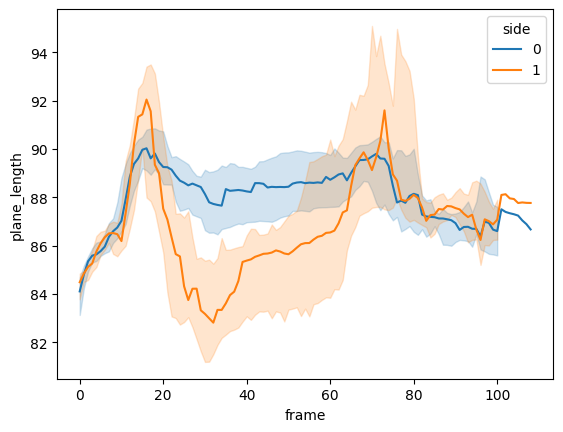

In [69]:
sns.lineplot(data=df, x='frame', y='plane_length', hue='side', estimator="median")

In [71]:
total_results["A"]["landmarks"]["pose"][40, 13, :-1] - total_results["A"]["landmarks"]["pose"][40, 11, :-1]

array([0.04042065, 0.3723169 , 0.05169474])

In [86]:
total_results["A"]["landmarks"]["pose"][40, 5, :-1] - total_results["A"]["landmarks"]["pose"][40, 2, :-1]

array([-7.40943849e-02,  6.15747273e-03,  9.42349434e-05])

In [72]:
total_results["A"]["landmarks"]["pose"][40, [11, 13], :-1]

array([[ 0.67313576,  0.54444396, -0.23994577],
       [ 0.71355641,  0.91676086, -0.18825103]])

In [82]:
total_results["A"]["landmarks"]["pose"][40, 11, :-1]

array([ 0.67313576,  0.54444396, -0.23994577])

In [83]:
total_results["A"]["landmarks"]["pose"][40, 12, :-1]

array([ 0.33995906,  0.52215654, -0.36117199])

In [120]:
df.loc[(slice(None), slice(15, 70), 0), :].median()

plane_length    88.745625
total_length    89.384459
dtype: float64

In [121]:
df.loc[(slice(None), slice(15, 70), 0), :].mean()

plane_length    88.508832
total_length    89.470270
dtype: float64

In [142]:
df.loc[(slice(None), slice(None), 0), :].max()

plane_length     93.463461
total_length    141.004554
dtype: float64

In [136]:
df[df.plane_length > 95]

plane_length  total_length
letter frame side                            
A      24    1        95.021360    186.511359
       25    1        95.140437    186.634593
       26    1        95.273445    186.605874
       27    1        95.385525    184.322530
       28    1        95.492592    183.812218
...                         ...           ...
Z      59    1        96.922375    165.632009
       60    1        96.896867    165.281027
       61    1        96.895750    165.402582
       62    1        97.156723    165.167910
       63    1        96.988628    161.746699

[264 rows x 2 columns]

In [104]:
def improve_z_mp_v0(pose_landmarks, frame_width, frame_height, upperarm_length):
    scale = np.array([frame_width, frame_height, frame_width], dtype=np.float64)
    return_landmarks = pose_landmarks[:, :-1] * scale
    return_landmarks[[11, 12, 23, 24], -1] = 0

    upperarm_vectors = 
    return_landmarks[13:15, -1] = np.sign(pose_landmarks[13:15, 2] - pose_landmarks[11:13, 2]) * np.sqrt(
        upperarm_length * upperarm_length - ((return_landmarks[13:15, :-1] - return_landmarks[11:13, :-1]) * (return_landmarks[13:15, :-1] - return_landmarks[11:13, :-1])).sum(axis=1)
    )

    return return_landmarks / scale

In [119]:
improve_z_mp_v0(total_results["A"]["landmarks"]["pose"][40], 320, 240, 89)

C:\Users\Jon\AppData\Local\Temp\ipykernel_9644\3199659395.py:6: RuntimeWarning: invalid value encountered in sqrt
  return_landmarks[13:15, -1] = np.sign(pose_landmarks[13:15, 2] - pose_landmarks[11:13, 2]) * np.sqrt(


array([[ 0.49601212,  0.2813476 , -0.94502449],
       [ 0.52151287,  0.23164442, -0.88796818],
       [ 0.53601146,  0.23183531, -0.88803512],
       [ 0.54616237,  0.23262221, -0.88785475],
       [ 0.47602248,  0.23666927, -0.8881098 ],
       [ 0.46191707,  0.23799278, -0.88794088],
       [ 0.44812459,  0.24047612, -0.88855112],
       [ 0.56654096,  0.25637445, -0.49883574],
       [ 0.43742865,  0.26254195, -0.49004811],
       [ 0.52591896,  0.32817587, -0.80373573],
       [ 0.47072905,  0.3298066 , -0.80203247],
       [ 0.67313576,  0.54444396,  0.        ],
       [ 0.33995906,  0.52215654,  0.        ],
       [ 0.71355641,  0.91676086,         nan],
       [ 0.22691448,  0.89453638,         nan],
       [ 0.71856272,  1.18329585, -0.51520896],
       [ 0.38082808,  0.69276315, -1.62380123],
       [ 0.72286081,  1.2744081 , -0.59489602],
       [ 0.43151325,  0.65434158, -1.78689706],
       [ 0.69858444,  1.24756134, -0.64338803],
       [ 0.44089919,  0.60428923, -1.753

In [132]:
# Initialize MediaPipe Solutions
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

for letter in total_results.keys():
    # Upload the video
    video_path = "../Datos/Brutos/Letras_Spread/%s.mp4" % letter
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video is uploaded
    if not cap.isOpened():
        raise Exception("Problem uploading the video.")
    
    # Initialize output video
    out = cv2.VideoWriter(
        filename="../Datos/Procesados/Letras_Spread_Esqueletos/%s.mp4" % letter,
        fourcc=cv2.VideoWriter_fourcc(*'mp4v'),
        fps=cap.get(cv2.CAP_PROP_FPS),
        frameSize=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    )
    
    # Configure MediaPipe Holistic Landmaker
    with mp_holistic.Holistic(
        static_image_mode=False,
        model_complexity=1,
        smooth_landmarks=True,
        enable_segmentation=False,
        refine_face_landmarks=False,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.9
    ) as holistic:
        while cap.isOpened():
            # Take a frame of the video
            ret, frame = cap.read()
            
            # Check if the frame is read
            if not ret:
                # If not, finish the process
                break
    
            # Detect landmarks (OpenCV works in BGR, while the landmaker in RGB)
            results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
            # Create the frame where landmarks will be drawn
            annotated_frame = frame.copy()
    
            # Draw pose, left and right hands, and face landmarks on the image.
            mp_drawing.draw_landmarks(
                annotated_frame,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )
            mp_drawing.draw_landmarks(
                annotated_frame,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec=mp_drawing_styles.get_default_hand_connections_style()
            )
            mp_drawing.draw_landmarks(
                annotated_frame,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec=mp_drawing_styles.get_default_hand_connections_style()
            )
            mp_drawing.draw_landmarks(
                annotated_frame,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
            )
    
            # Include the annotated frame in the output video
            out.write(annotated_frame)
    
    # Release resources
    out.release()
    cap.release()